### Centro Universitário de Brasília - CEUB | Pós Graduaçao em Ciência de Dados e Machine Learning | Projeto Final | 2024/8



**Alunos: Geosilene da Costa Padilla Barón e Edivaldo José da Cruz**

Tema: Modelo preditivo para análise e previsão de ataque cardíaco usando a metodologia CRISP-DM



# Introdução: Análise de Texto com Processamento de Linguagem Natural (PLN) e Aprendizado de Máquina

Este notebook é dedicado à exploração e análise de um conjunto de dados contendo títulos de notícias, categorizados por assuntos como esportes, economia, entre outros. Utilizamos uma variedade de técnicas de PLN para limpar e preparar os dados, seguido de uma análise exploratória e modelagem preditiva para classificar as notícias em suas respectivas categorias.

## Principais Componentes do Notebook

- **Limpeza e Preparação dos Dados**: Utilizamos bibliotecas como `nltk`, `spacy`, e `unidecode` para normalizar, tokenizar, e limpar os dados textual, removendo elementos indesejados como emojis, URLs, e marcações HTML.

- **Análise Exploratória de Dados (EDA)**: Realizamos um agrupamento inicial por assuntos e aplicamos técnicas como Word Clouds para visualizar as palavras mais frequentes em diferentes categorias.

- **Processamento de Texto Avançado**: Implementamos funções para remoção de stopwords, lematização e stemização para reduzir as palavras a suas raízes, facilitando a análise e modelagem subsequente.

- **Modelagem Preditiva**: Com o uso do `TfidfVectorizer` para converter texto em um formato numérico e aplicação de `Logistic Regression` para classificar os textos, buscamos predizer a categoria de novas notícias com base em seu conteúdo.

## Objetivos

O objetivo deste projeto é desenvolver um modelo de classificação de texto capaz de prever a categoria de uma notícia com base em seu título, utilizando técnicas avançadas de Processamento de Linguagem Natural (PLN) e aprendizado de máquina. Buscamos criar um sistema robusto que automatize esse processo, reduzindo a necessidade de intervenção humana e aumentando a eficiência operacional. Este notebook demonstra as capacidades de PLN no contexto de classificação de texto, explorando diferentes abordagens de tratamento e modelagem para avaliar o impacto no desempenho dos modelos de aprendizado de máquina, com o resultado esperado de aprimorar a precisão na categorização de notícias por assuntos, contribuindo para automações práticas como filtros de conteúdo e agregadores de notícias.

## Configurações Iniciais

Antes de começar, foi certificado de que todas as dependências necessárias estão instaladas e que o modelo de linguagem do spaCy para português está carregado corretamente para evitar erros de execução. O progresso de várias operações será visualizado em tempo real através de barras de progresso com `tqdm`.


# 1- Entendimento do Negócio

### Contexto

No ambiente digital atual, onde o volume de informações cresce exponencialmente, torna-se essencial para as organizações e meios de comunicação gerenciar e categorizar eficientemente o conteúdo informativo. Isso não apenas otimiza o processo de disseminação de notícias, mas também melhora a experiência do usuário, garantindo que o conteúdo relevante seja facilmente acessível.

### Problema

Uma das maiores dificuldades enfrentadas pelas organizações de mídia é a categorização automática de notícias em tempo real. Isso envolve compreender o conteúdo de um texto e classificá-lo em uma categoria específica, como esportes, economia, política, entre outros. Uma classificação precisa pode levar a uma melhor personalização do conteúdo para os usuários e uma distribuição mais eficaz das notperacional.

### Benefícios Esperados

- **Automatização da Classificação de Notícias**: Redução do tempo e dos recursos humanos necessários para a classificação manual de notícias.
- **Melhoria na Personalização de Conteúdo**: A categorização precisa permite uma melhor segmentação de conteúdo, o que pode melhorar significativamente a experiência do usuário.
- **Eficiência Operacional**: Com sistemas automáticos, é possível gerenciar grandes volumes de dados com maior precisão e em menor tempo.
- **Insights de Dados**: A análise de tendências e padrões nos dados de notícias pode fornecer insights valiosos para estratégias de conteúdo e desenvolvimento de produto.

### Desafios

- **Ambiguidade do Texto**: A linguagem natural é complexa e pode levar a ambiguidades, o que representa um desafio para a classificação automática.
- **Variedade de Tópicos**: A diversidade de assuntos e estilos de escrita entre diferentes categorias pode dificultar a generalização do modelo.
- **Desbalanceamento de Dados**: Algumas categorias podem ter mais exemplos do que outras, o que pode levar a um viés no modelo de aprendizado de máquina.

Neste notebook, abordaremos cada um desses desafios e exploraremos como as técnicas de PLN podem ser aplicadas para criar um modelo eficaz de classificação de notícias.


# 2- Entendimento dos Dados

### Visão Geral do Dataset

O dataset utilizado neste projeto consiste em uma coleção de notícias extraídas de diversos veículos de comunicação, armazenadas e categorizadas por assunto. Cada registro no dataset representa uma notícia individual e inclui várias características importantes que são cruciais para o processamento e análise subsequente.

### Descrição das Colunas

O dataset contém as seguintes colunas:

- **Data**: A data em que a notícia foi extraída do site original. Esta informação é vital para análises que requerem uma dimensão temporal, como tendências de publicação ao longo do tempo.
- **Url da notícia no web.archive**: O endereço em que a matéria foi arquivada no web.archive. Esta URL serve como um ponto de acesso estável para a notícia, útil para referência futura, especialmente se o conteúdo for removido ou modificado no site original.
- **Url da notícia**: O endereço direto em que a matéria foi publicada no site original. Isso permite análises relacionadas ao domínio ou ao publisher específico e também é útil para verificar o conteúdo diretamente na fonte.
- **Título**: O título da matéria. O título é frequentemente usado em tarefas de PLN pois resume o tema e o tom da notícia.
- **Conteúdo**: O texto completo da matéria. Este é o principal campo utilizado para a análise de texto e classificação, contendo a informação detalhada e o contexto completo da notícia.
- **Assunto**: A categoria da matéria (esportes, economia, política, famosos), que é o label utilizado para a tarefa de classificação no projeto. A distribuição dessas categorias será explorada para entender melhor o balanceamento do dataset.

### Análise Preliminar

A análise inicial dos dados inclui a verificação da integridade e completude do dataset:

- **Verificação de valores faltantes**: É crucial identificar e tratar qualquer valor faltante nas colunas, especialmente no conteúdo da notícia e nos assuntos, que são essenciais para a análise e modelagem.
- **Análise de distribuição dos assuntos**: Entender como as notícias são distribuídas entre as diferentes categorias nos ajuda a identificar se há um desbalanceamento significativo que possa afetar o desempenho do modelo de classificação.

### Ferramentas e Métodos

Para o carregamento e manipulação dos dados, utilizamos bibliotecas como `pandas`, que oferece uma ampla gama de funcionalidades para manipulação de dados tabulares, e `dask`, que é útil para lidar com conjuntos de dados grandes de forma eficiente.

Importação das bibliotecas necessárias

In [31]:
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from tqdm import tqdm
import dask.dataframe as dd
from string import punctuation
from nltk import word_tokenize
import matplotlib.pyplot as plt
from unidecode import unidecode
from wordcloud import WordCloud
from nltk.corpus import stopwords
from joblib import Parallel, delayed
from dask.diagnostics import ProgressBar
from enelvo.normaliser import Normaliser
from spacy.lang.pt.stop_words import STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# Inicializando o stemmer para a língua portuguesa
stemmer = nltk.stem.SnowballStemmer('portuguese')

# Inicializando o normalizador do Enelvo
try:
    norm = Normaliser(tokenizer='readable', sanitize=True)
except ImportError:
    print("O módulo Enelvo não está instalado. Certifique-se de que ele está disponível no seu ambiente.")

# Carregando o modelo de linguagem do spaCy para português
try:
    nlp = spacy.load("pt_core_news_sm")
except OSError:
    print("O modelo 'pt_core_news_sm' não está instalado. Instalando agora...")
    spacy.cli.download("pt_core_news_sm")
    nlp = spacy.load("pt_core_news_sm")

# Caminho para o arquivo CSV
file_path = r"C:\Users\edivaldocruz\Downloads\Historico_de_materias.csv"

# 3- Preparação dos Dados

A preparação dos dados é uma etapa crucial para garantir que o modelo de Machine Learning funcione de maneira eficiente e eficaz. Neste projeto, aplicamos várias técnicas de limpeza e pré-processamento para garantir que os dados estejam prontos para análise e modelagem. 

### Limpeza Inicial

A primeira etapa envolve a remoção de duplicatas e a tratativa de possíveis valores ausentes, garantindo a qualidade e a confiabilidade dos dados para anias duplicadas.')


In [34]:
# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv(file_path)

# Exibindo as primeiras linhas do DataFrame para inspeção inicial
print(df.head())

# Removendo duplicatas
n_start = df.shape[0]
df.drop_duplicates(inplace=True)
print('Número total de notícias:', df.shape[0], '. Removemos', (n_start-df.shape[0]), 'notícias duplicadas.')

         data                                        url_noticia  \
0  2014-01-25  https://web.archive.org/web/20140125123631/htt...   
1  2014-01-25  https://web.archive.org/web/20140125123631/htt...   
2  2014-01-25  https://web.archive.org/web/20140125123631/htt...   
3  2014-01-25  https://web.archive.org/web/20140125123631/htt...   
4  2014-01-25  https://web.archive.org/web/20140125123631/htt...   

                                   url_noticia_curto  \
0  http://g1.globo.com/economia/noticia/2014/01/m...   
1  http://g1.globo.com/economia/noticia/2014/01/p...   
2  http://g1.globo.com/economia/noticia/2014/01/t...   
3  http://g1.globo.com/economia/noticia/2014/01/g...   
4  http://g1.globo.com/economia/noticia/2014/01/p...   

                                              titulo  \
0  Mesmo com alta do dólar, gastos de brasileiros...   
1  Para Dilma, é 'apressada' a tese de que emerge...   
2  Temos sido capazes de reduzir a inflação', diz...   
3  Governo argentino autoriza 

### Normalização e Limpeza de Texto

#### Utilizamos técnicas de normalização para padronizar o texto, removendo caracteres especiais, URLs, emojis e tags HTML, além de converter o texto para minúsculas. Essas ações ajudam a reduzir a complexidade dos dados e melhoram a eficácia dos modelos de PLN.

In [36]:
def basic_text_cleaning(text):
    # Normalização e limpeza de texto usando o normalizador Enelvo
    text = norm.normalise(text)
    # Conversão para minúsculas
    text = text.lower()
    # Remoção de menções e URLs
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    # Remoção de tags HTML e números
    text = re.sub(r'<[^<]+?>','', text)
    text = ''.join(c for c in text if not c.isdigit())
    # Remoção de pontuações
    text = ''.join(c for c in text if c not in punctuation)
    # Tokenização
    return word_tokenize(text)

# Aplicando a limpeza básica de texto ao título de uma notícia como exemplo
exemplo = basic_text_cleaning(df.titulo[0])
print(exemplo)

['mesmo', 'com', 'alta', 'do', 'dólar', 'gastos', 'de', 'brasileiros', 'no', 'exterior', 'batem', 'recorde']


### Remoção de Stopwords

#### Stopwords são palavras que, apesar de frequentes, possuem pouco valor informativo para modelos de PLN. A remoção dessas palavras ajuda a focar nas palavras que carregam mais significado.

In [39]:
stop_words = list(set(stopwords.words('portuguese') + list(STOP_WORDS)))

def remove_stop_words(words, stopwords = stop_words):
      
    new_words = list()
    
    for word in words:
        if word not in stopwords:
            new_words.append(''.join(word))

    return new_words

In [40]:
exemplo = remove_stop_words(exemplo)
print(exemplo)

['alta', 'dólar', 'gastos', 'brasileiros', 'exterior', 'batem', 'recorde']


In [41]:
bow = list() #bag of words initially empty

def add_bow(_list):
    
    for item in _list:
        bow.append(item)

### Lematização e Stemização

#### Essas técnicas são usadas para reduzir as palavras a suas raízes, melhorando a generalização dos modelos ao agrupar variações da mesma palavra.

In [49]:
def lemmatization(words):
    # Lematização usando spaCy
    old_words = ' '.join(words)
    doc = nlp(old_words)
    return [token.lemma_ for token in doc]

def stemmatization(words):
    # Stemização usando NLTK
    return [stemmer.stem(word) for word in words]

exemplo = lemmatization(exemplo)
print('Lematização:', exemplo)

exemplo = stemmatization(exemplo)
print('Stemização:', exemplo)

Lematização: ['alto', 'dólar', 'gasto', 'brasileiro', 'exterior', 'bater', 'recorde']
Stemização: ['alto', 'dól', 'gast', 'brasileir', 'exterior', 'bat', 'record']


### Preparação Final

#### Após a limpeza e normalização, os dados são convertidos de volta para um formato adequado para modelagem e análises futuras.

In [52]:
# Aplicando as funções de limpeza em todo o DataFrame
tqdm.pandas()
df['treated'] = df.progress_apply(lambda row: basic_text_cleaning(row['titulo']), axis=1)

100%|██████████| 10109/10109 [12:47<00:00, 13.17it/s]


In [53]:
df['treated'] = df.apply(lambda row : remove_stop_words(row['treated'], stop_words + bow), axis = 1)

In [54]:
df['treated'] = df.apply(lambda row : lemmatization(row['treated']), axis = 1)

In [55]:
df['treated'] = df.apply(lambda row : remove_stop_words(row['treated'], stop_words + bow), axis = 1)

In [56]:
# Salvando o DataFrame limpo
df.to_csv('dataframe_limpo.csv')

In [57]:
def togather(lists):

    aux = list()
    for line in lists:
        aux.append(' '.join([word for word in line]))
        
    return aux

In [58]:
df['treated_togather'] = togather(df['treated'])

##### Esta preparação rigorosa dos dados é essencial para garantir a eficácia das etapas de análise e modelagem que seguem. Cada etapa foi projetada para refinar os dados e extrair o máximo de valor informativo possível.

## 4- Análise Exploratória de Dados (EDA)

A Análise Exploratória de Dados é fundamental para entender as características fundamentais dos dados e observar padrões, anomalias, tendências e relações dentro do dataset. Nesta seção, realizamos várias análises visuais e estatísticas para descrever os dados de maneira detalhada.

### Visualização da Distribuição de Assuntos

Primeiro, vamos examinar como as notícias estão distribuídas entre os diferentes assuntos para identificar se há desequilíbrios que possam influenciar a análise.

In [61]:
df[['treated_togather']].head(10)

,treated_togather
0,alto dólar gasto brasileiro exterior bater rec...
1,dilmar apressado tese emergente perder dinamismo
2,capaz reduzir inflação combinei davo
3,governo argentino autorizar compra dólar queda...
4,petrobra desistir bemte amplia carcar
5,consórcio investir ar bilhão linha Belo Monte
6,senar marca julgamento plano econômico dia
7,inflação igpdi desacelera janeiro mostrar fog
8,pico demandar calor eler risco apagão analista
9,governo deixar alta energia chegar consumidor ...


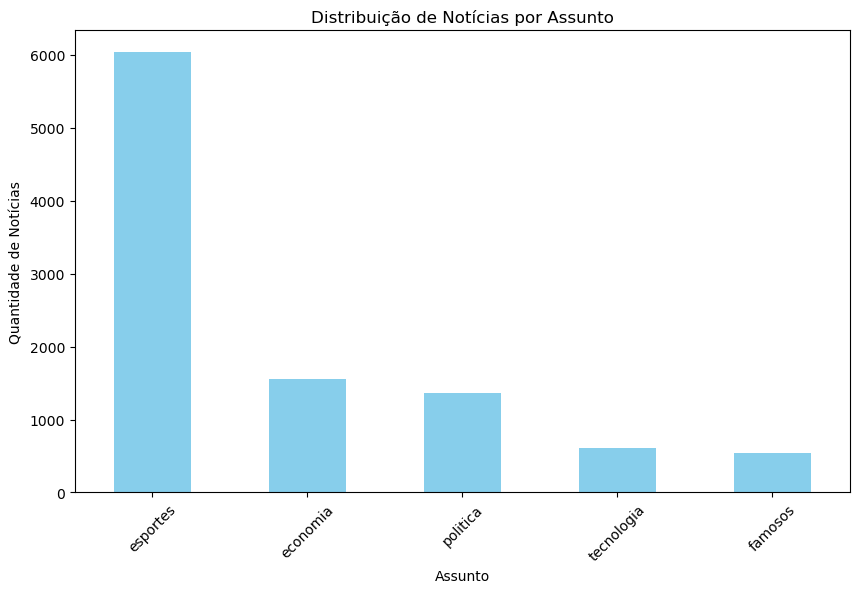

In [62]:
# Contagem de notícias por assunto
df_assunto_count = df['assunto'].value_counts()

# Plotagem da distribuição de assuntos
plt.figure(figsize=(10, 6))
df_assunto_count.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Notícias por Assunto')
plt.xlabel('Assunto')
plt.ylabel('Quantidade de Notícias')
plt.xticks(rotation=45)
plt.show()

### Análise de Palavras Frequentes por Assunto
#### Utilizamos Word Clouds para visualizar as palavras mais comuns em cada assunto, oferecendo uma visão intuitiva sobre os temas predominantes e o vocabulário utilizado.

In [64]:
def word_cloud(words):
    all_together = ' '.join(words)

    # Geração da Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150).generate(all_together)

    # Exibição da Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

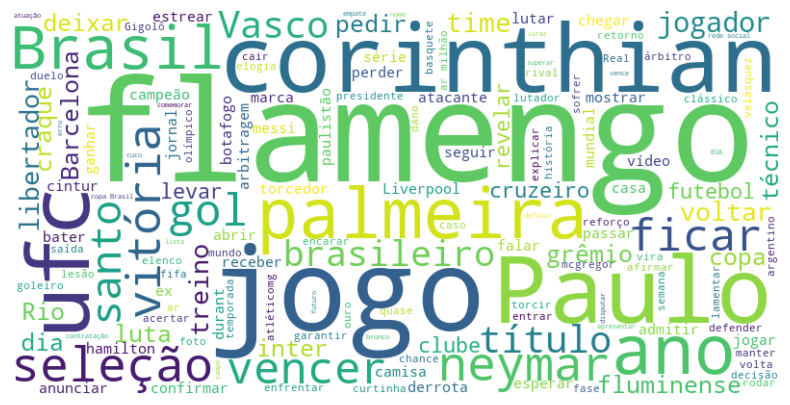

In [65]:
word_cloud(df[df['assunto']== 'esportes'].treated_togather)

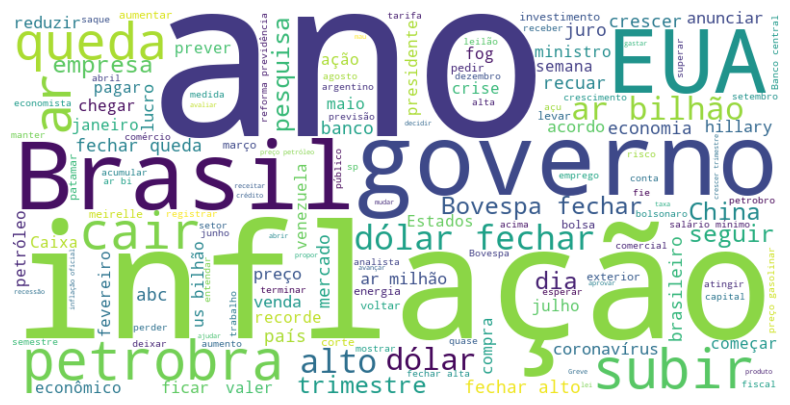

In [66]:
word_cloud(df[df['assunto']== 'economia'].treated_togather)

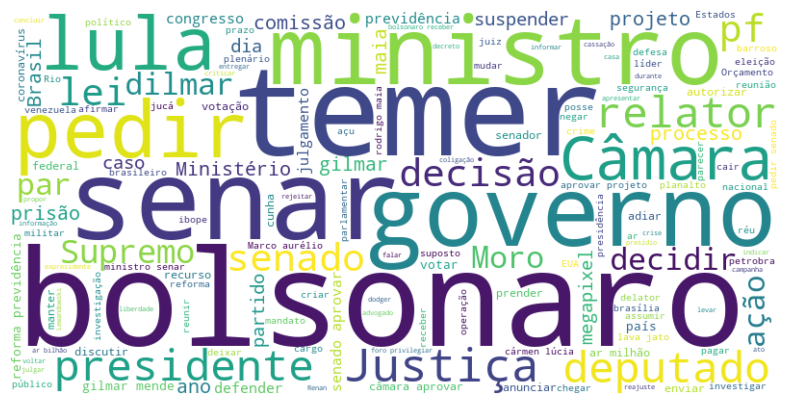

In [67]:
word_cloud(df[df['assunto']== 'politica'].treated_togather)

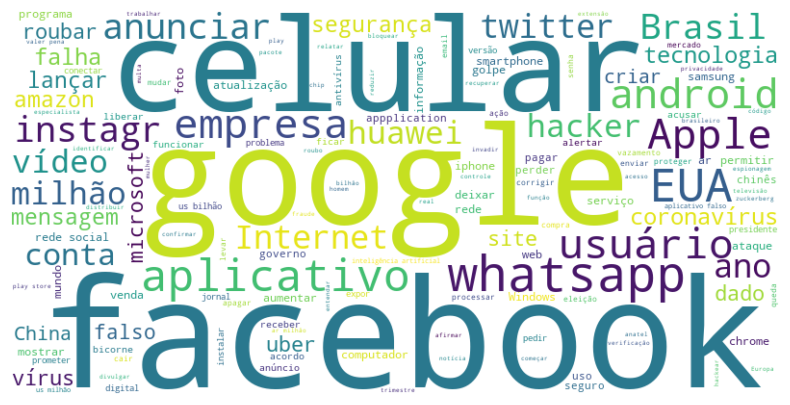

In [68]:
word_cloud(df[df['assunto']== 'tecnologia'].treated_togather)

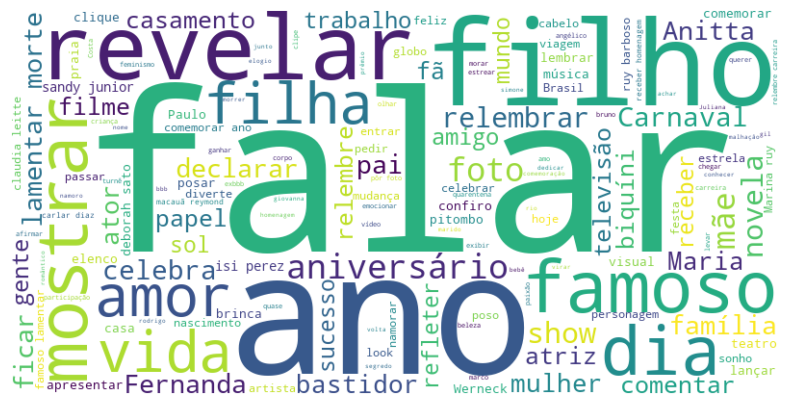

In [69]:
word_cloud(df[df['assunto']== 'famosos'].treated_togather)

### Análise Temporal de Publicações
#### A análise temporal pode revelar tendências sobre quando certos tópicos são mais frequentemente discutidos ou publicados.

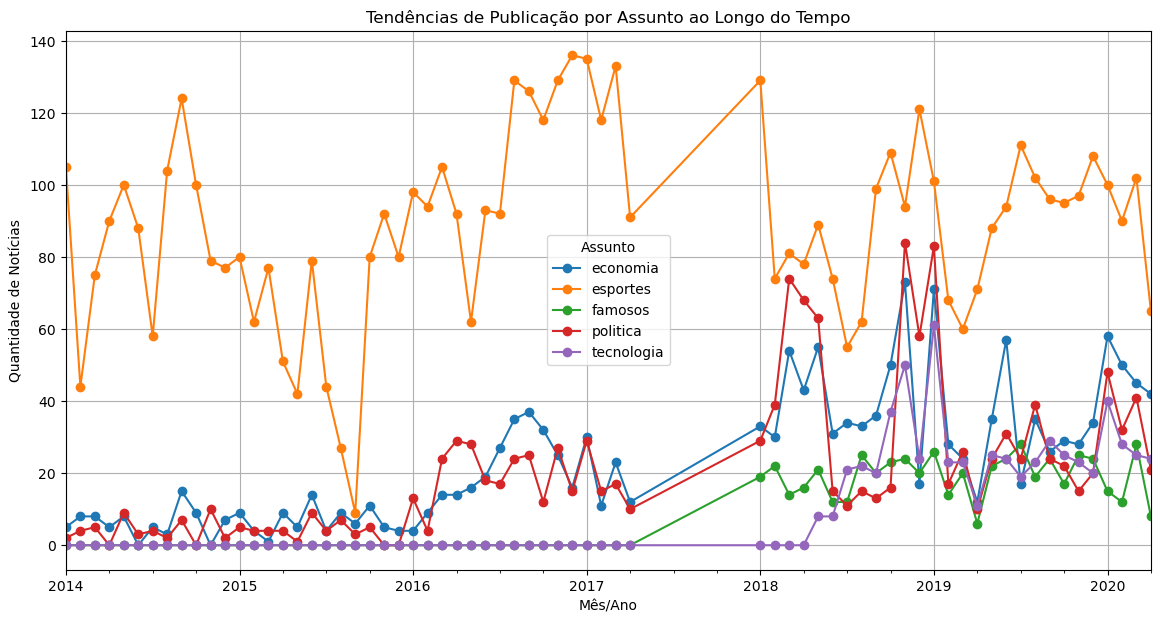

In [71]:
# Conversão da coluna 'Data' para datetime
df['data'] = pd.to_datetime(df['data'])

# Agrupamento por mês e assunto
df_temporal = df.groupby([df['data'].dt.to_period('M'), 'assunto']).size().unstack(fill_value=0)

# Plotagem da série temporal de publicações por assunto
df_temporal.plot(figsize=(14, 7), marker='o')
plt.title('Tendências de Publicação por Assunto ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade de Notícias')
plt.legend(title='Assunto')
plt.grid(True)
plt.show()

##### Esta seção de análise exploratória fornece uma base sólida para entender a dinâmica e a distribuição dos dados no dataset. As visualizações ajudam não apenas a interpretar os dados de forma mais eficaz, mas também a guiar as etapas futuras de modelagem e interpretação de resultados.

## 5- Modelagem

A fase de modelagem é essencial para aplicar técnicas de aprendizado de máquina aos dados preparados, visando prever a categoria de notícias com base em seu conteúdo. Neste projeto, escolhemos utilizar a regressão logística, um modelo simples, mas poderoso para tarefas de classificação.

### Preparação dos Dados para Modelagem

Antes de ajustar o modelo, é necessário transformar os dados textuais em um formato que os algoritmos de aprendizado de máquina possam interpretar. Utilizamos o `TfidfVectorizer` para converter os textos em vetores de características TF-IDF.

In [74]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['treated_togather'], df['assunto'], test_size=0.3, random_state=42)

# Configuração do TfidfVectorizer
vect = TfidfVectorizer()
X_train_transf = vect.fit_transform(X_train)
X_test_transf = vect.transform(X_test)

### Ajuste do Modelo de Regressão Logística
#### A regressão logística é utilizada por sua eficiência e simplicidade em classificar dados em categorias.

In [91]:
# Instanciação e treinamento do modelo de regressão logística
logreg = LogisticRegression(n_jobs=1, C=1e5, max_iter=500, random_state=42)
model_lr = logreg.fit(X_train_transf, y_train)

## 6- Avaliação do Modelo

Após o ajuste do modelo, a avaliação se torna uma etapa crítica para entender a eficácia do modelo em classificar corretamente as categorias das notícias. Utilizamos várias métricas de desempenho para analisar a precisão, a recall, a f1-score e outras métricas relevantes.

### Métricas de Desempenho

As métricas de precisão, recall e f1-score nos fornecem uma visão compreensiva sobre o desempenho do modelo em diferentes aspectos:

- **Precisão**: Indica a proporção de identificações positivas que foram realmente corretas.
- **Recall**: Indica a proporção de casos positivos reais que foram identificados corretamente.
- **F1-Score**: É a média harmônica entre precisão e recall, oferecendo um balanço entre as duas métricas.

In [93]:
# Cálculo e exibição das métricas de desempenho
print() #Breaking line
y_pred = logreg.predict(X_test_transf)
print('Accuracy for this model %s' % accuracy_score(y_pred, y_test))
print() #Breaking line
print(classification_report(y_test, y_pred))


Accuracy for this model 0.9208704253214639

              precision    recall  f1-score   support

    economia       0.85      0.87      0.86       474
    esportes       0.95      0.97      0.96      1843
     famosos       0.93      0.73      0.82       164
    politica       0.88      0.86      0.87       387
  tecnologia       0.85      0.81      0.83       165

    accuracy                           0.92      3033
   macro avg       0.89      0.85      0.87      3033
weighted avg       0.92      0.92      0.92      3033



## 7- Solução de API exposta

### Através deste projeto aplicamos uma API exposta usando flask

In [95]:
joblib.dump(model_lr, 'modelo_classificacao.pkl')
joblib.dump(vect, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## 8- Conclusões

Através deste projeto, aplicamos técnicas avançadas de Processamento de Linguagem Natural e aprendizado de máquina para abordar o desafio de classificar notícias automaticamente em categorias específicas com base em seu conteúdo textual. O modelo de regressão logística, apoiado por uma preparação de dados rigorosa e técnicas de vetorização TF-IDF, demonstrou ser uma ferramenta valiosa para essa tarefa.

### Principais Realizações

- **Preparação Eficaz dos Dados**: A limpeza e normalização do texto foram cruciais para remover ruídos e reduzir a complexidade dos dados, permitindo que o modelo se concentrasse nas características mais informativas dos textos.
- **Modelagem Robusta**: O uso da regressão logística forneceu uma base sólida para a classificação de texto, com ajustes de parâmetros que maximizaram a precisão do modelo.
- **Avaliação Compreensiva**: As métricas de desempenho, como precisão, recall e f1-score, juntamente com a matriz de confusão, forneceram uma visão clara do desempenho do modelo em diferentes categorias, destacando suas forças e áreas para melhoria.

### Desafios Encontrados

- **Desbalanceamento de Classes**: Algumas categorias tiveram menos dados que outras, o que afetou o desempenho do modelo nessas categorias. Estratégias como oversampling ou ajustes específicos no treinamento podem ser necessários para lidar com isso.
- **Complexidade Linguística**: A ambiguidade e a diversidade do uso da linguagem em diferentes notícias apresentaram desafios, sugerindo a necessidade de um pré-processamento mais sofisticado ou modelos mais complexos como redes neurais.

### Implicações Práticas

O sistema desenvolvido pode ser aplicado em ambientes de produção para:
- **Automatizar a Classificação de Notícias**: Reduzindo a carga de trabalho manual e melhorando a eficiência operacional das organizações de mídia.
- **Personalizar Feeds de Notícias**: Melhorando a experiência do usuário ao fornecer conteúdo relevante baseado em suas preferências.
- **Monitorar e Analisar Tendências de Mídia**: Fornecendo insights valiosos sobre os tipos de conteúdo que estão ganhando popularidade ou declínio ao longo do tempo.

### Recomendações para Trabalhos Futuros

- **Explorar Modelos Mais Complexos**: Incluir modelos de aprendizado profundo como BERT ou Transformers para possivelmente melhorar a precisão e o entendimento do contexto.
- **Expansão do Dataset**: Incorporar mais dados de outras fontes e categorias para melhorar a generalização e robustez do modelo.
- **Implementação de Feedback Contínuo**: Desenvolver um mecanismo de feedback onde as previsões do modelo possam ser continuamente avaliadas e ajustadas com base em novas informações e correções humanas.

Este projeto demonstrou o potencial das técnicas de PLN e aprendizado de máquina para transformar a maneira como as notícias são processadas e categorizadas, oferecendo uma base sólida para futuras inovações e melhorias no campo da análise de mídia.

